# Агентство недвижимости

## 1. Определение цели проекта


Цель проекта — разработать сервис для предсказания стоимости домов на основе истории предложений.

## 2. Сбор данных

Для анализа потребуется собрать данные о недвижимостях. У нас есть предоставленный датасет.

## Библиотеки

In [1]:
#импорт библиотек
import csv
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn.linear_model import LinearRegression
from sklearn import metrics #метрики
from sklearn.preprocessing import LabelEncoder #предобработка
from sklearn.model_selection import train_test_split #сплитование выборки
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV  
from sklearn.ensemble import GradientBoostingClassifier

## 3. Предобработка данных


In [2]:
#читаем выданные данные
data = pd.read_csv(r'C:\Users\User\OneDrive\Рабочий стол\курсы\уроки курсов\FINAL\data.csv')
data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


Каждая недвижимость описывается следующими признаками:

1. status - статус
2. private pool	- частный бассейн
3. propertyType	- тип недвижимости
4. street	- улица
5. baths	- бани
6. homeFacts-	предметы домашнего обихода
7. fireplace-	камин
8. city	- город
9. schools	- школы
10. sqft	- площадь
11. zipcode	- почтовый индекс
12. beds	- кровати
13. state	- штат
14. stories	- истории
15. mls-id	- mls-идентификатор
16. PrivatePool	- личный бассейн
17. MlsId	 - MLSидентификатор
18. target - цель(целевой признак)

In [3]:
data.shape

(377185, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Признаки с болле чем 40 процентом пропусков в дальнейшем мы удалим(то есть private pool, fireplace, mls-id, PrivatePool)

In [5]:
data.describe()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103114,377151,377185,336608,377185,285903,377185,226469,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1652,2026,297365,25405,4549,1184,39,347,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


In [6]:
home_data = data.copy()

In [7]:
home_data['baths'] = home_data['baths'].str.extract('(\d+)')
# Преобразуем извлеченные значения в числовой тип (если нужно)
home_data['baths'] = pd.to_numeric(home_data['baths'])



home_data['beds'] = home_data['beds'].str.extract('(\d+)')
# Преобразуем извлеченные значения в числовой тип (если нужно)
home_data['beds'] = pd.to_numeric(home_data['beds'])



home_data['zipcode'] = home_data['zipcode'].str.extract('(\d+)')
# Преобразуем извлеченные значения в числовой тип (если нужно)
home_data['zipcode'] = pd.to_numeric(home_data['zipcode'])



home_data['stories'] = home_data['stories'].str.extract('(\d+)')
# Преобразуем извлеченные значения в числовой тип (если нужно)
home_data['stories'] = pd.to_numeric(home_data['stories'])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_11540\3900140291.py:1: SyntaxWarning: invalid escape sequence '\d'
  home_data['baths'] = home_data['baths'].str.extract('(\d+)')
C:\Users\User\AppData\Local\Temp\ipykernel_11540\3900140291.py:7: SyntaxWarning: invalid escape sequence '\d'
  home_data['beds'] = home_data['beds'].str.extract('(\d+)')
C:\Users\User\AppData\Local\Temp\ipykernel_11540\3900140291.py:13: SyntaxWarning: invalid escape sequence '\d'
  home_data['zipcode'] = home_data['zipcode'].str.extract('(\d+)')
C:\Users\User\AppData\Local\Temp\ipykernel_11540\3900140291.py:19: SyntaxW

In [8]:
home_data['sqft'] = home_data['sqft'].replace({'sqft': '', ',':''}, regex=True)
home_data['sqft'] = pd.to_numeric(home_data['sqft'], errors='coerce')

In [9]:
home_data['target'] = home_data['target'].replace({'\$': '', ',':''}, regex=True)
home_data['target'] = pd.to_numeric(home_data['target'], errors='coerce')

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\User\AppData\Local\Temp\ipykernel_11540\415010170.py:1: SyntaxWarning: invalid escape sequence '\$'
  home_data['target'] = home_data['target'].replace({'\$': '', ',':''}, regex=True)


In [10]:
home_data.head()

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,NC,NaN,NaN,NaN,611019,418000.0
1,for sale,NaN,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,WA,2.0,NaN,NaN,201916904,310000.0
2,for sale,NaN,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,CA,1.0,NaN,yes,FR19221027,2895000.0
3,for sale,NaN,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,TX,3.0,NaN,NaN,14191809,2395000.0
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,FL,NaN,NaN,NaN,861745,5000.0


In [11]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        337267 non-null  object 
 1   private pool  4181 non-null    object 
 2   propertyType  342452 non-null  object 
 3   street        377183 non-null  object 
 4   baths         269347 non-null  float64
 5   homeFacts     377185 non-null  object 
 6   fireplace     103114 non-null  object 
 7   city          377151 non-null  object 
 8   schools       377185 non-null  object 
 9   sqft          312109 non-null  float64
 10  zipcode       377183 non-null  float64
 11  beds          268322 non-null  float64
 12  state         377185 non-null  object 
 13  stories       214395 non-null  float64
 14  mls-id        24942 non-null   object 
 15  PrivatePool   40311 non-null   object 
 16  MlsId         310305 non-null  object 
 17  target        367043 non-null  float64
dtypes: f

In [12]:
# Посмотрим на пропуски. Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?
home_data.isnull().sum().sum()

1932470

In [13]:
home_data.describe()

,baths,sqft,zipcode,beds,stories,target
count,269347.000000,3.121090e+05,377183.000000,268322.000000,214395.000000,3.670430e+05
mean,3.317074,6.955128e+03,51473.464652,3.397299,1.930068,6.494312e+05
std,22.212482,1.642784e+06,26838.796582,4.545659,4.349870,1.858641e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,2.000000,1.234000e+03,32833.000000,3.000000,1.000000,1.850000e+05
50%,2.000000,1.799000e+03,37205.000000,3.000000,2.000000,3.200000e+05
75%,3.000000,2.589000e+03,77381.000000,4.000000,2.000000,5.890000e+05
max,750.000000,7.959794e+08,331446.000000,871.000000,1120.000000,1.950000e+08


In [14]:
home_data.columns

Index(['status', 'private pool', 'propertyType', 'street', 'baths',
       'homeFacts', 'fireplace', 'city', 'schools', 'sqft', 'zipcode', 'beds',
       'state', 'stories', 'mls-id', 'PrivatePool', 'MlsId', 'target'],
      dtype='object')

###  Очистка данных

В данном датасете присутствуют одинаковые столбцы, которые стоит объединить, потому что в них может содержаться разная информация.

In [15]:
home_data['MlsId'] = home_data['MlsId'].fillna('')
home_data['mls-id'] = home_data['mls-id'].fillna('')
home_data['MlsId'] = home_data['MlsId'] + home_data['mls-id']
del home_data['mls-id']
home_data

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,NC,NaN,NaN,611019,418000.0
1,for sale,NaN,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,WA,2.0,NaN,201916904,310000.0
2,for sale,NaN,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,CA,1.0,yes,FR19221027,2895000.0
3,for sale,NaN,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,TX,3.0,NaN,14191809,2395000.0
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,FL,NaN,NaN,861745,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...",4017.0,33180.0,5.0,FL,0.0,Yes,A10702700,1249000.0
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3.0,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...",2000.0,60657.0,3.0,IL,9.0,NaN,10374233,674999.0
377182,for sale,NaN,single-family home,15509 Linden Blvd,3.0,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...",1152.0,11434.0,3.0,NY,2.0,NaN,,528000.0
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028.0,8.0,TX,NaN,NaN,,34500.0


In [16]:
home_data['PrivatePool'] = home_data['PrivatePool'].fillna('')
home_data['private pool'] = home_data['private pool'].fillna('')
home_data['PrivatePool'] = home_data['PrivatePool'] + home_data['private pool']
home_data['PrivatePool'] = home_data['PrivatePool'].replace('', 'No')
del home_data['private pool']
home_data

,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,NC,NaN,No,611019,418000.0
1,for sale,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,WA,2.0,No,201916904,310000.0
2,for sale,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,CA,1.0,yes,FR19221027,2895000.0
3,for sale,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,TX,3.0,No,14191809,2395000.0
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,FL,NaN,No,861745,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"[{'rating': ['10/10', '5/10'], 'data': {'Dista...",4017.0,33180.0,5.0,FL,0.0,Yes,A10702700,1249000.0
377181,for sale,condo,3530 N Lake Shore Dr #4B,3.0,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"[{'rating': ['1/10', '5/10', '7/10'], 'data': ...",2000.0,60657.0,3.0,IL,9.0,No,10374233,674999.0
377182,for sale,single-family home,15509 Linden Blvd,3.0,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"[{'rating': ['5/10', '4/10'], 'data': {'Distan...",1152.0,11434.0,3.0,NY,2.0,No,,528000.0
377183,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,"[{'rating': ['NA', 'NA', 'NA'], 'data': {'Dist...",NaN,77028.0,8.0,TX,NaN,No,,34500.0


In [17]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        337267 non-null  object 
 1   propertyType  342452 non-null  object 
 2   street        377183 non-null  object 
 3   baths         269347 non-null  float64
 4   homeFacts     377185 non-null  object 
 5   fireplace     103114 non-null  object 
 6   city          377151 non-null  object 
 7   schools       377185 non-null  object 
 8   sqft          312109 non-null  float64
 9   zipcode       377183 non-null  float64
 10  beds          268322 non-null  float64
 11  state         377185 non-null  object 
 12  stories       214395 non-null  float64
 13  PrivatePool   377185 non-null  object 
 14  MlsId         377185 non-null  object 
 15  target        367043 non-null  float64
dtypes: float64(6), object(10)
memory usage: 46.0+ MB


###  Преобразование категориальных переменных


In [18]:
labelencoder = LabelEncoder()
home_data['city'] = labelencoder.fit_transform(home_data['city'])
home_data['state'] = labelencoder.fit_transform(home_data['state'])
home_data.head()

,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target
0,Active,Single Family Home,240 Heather Ln,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,1711,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,21,NaN,No,611019,418000.0
1,for sale,single-family home,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,1721,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,37,2.0,No,201916904,310000.0
2,for sale,single-family home,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,1034,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,3,1.0,yes,FR19221027,2895000.0
3,for sale,single-family home,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,433,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,33,3.0,No,14191809,2395000.0
4,for sale,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,1344,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,7,NaN,No,861745,5000.0


In [19]:
home_data['status'].value_counts()

status
for sale                156104
Active                  105207
For sale                 43465
foreclosure               6426
New construction          5475
                         ...  
Contingent   No Show         1
Coming soon: Oct 24.         1
Coming soon: Oct 21.         1
Coming soon: Nov 14.         1
Coming soon: Dec 23.         1
Name: count, Length: 159, dtype: int64

In [20]:
home_data['status'] = home_data['status'].replace({'for sale': 'For sale', 'Coming sooon: (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}\.': 'Coming soon'}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\User\AppData\Local\Temp\ipykernel_11540\1661509845.py:1: SyntaxWarning: invalid escape sequence '\d'
  home_data['status'] = home_data['status'].replace({'for sale': 'For sale', 'Coming sooon: (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}\.': 'Coming soon'}, regex=True)


In [21]:
home_data['status'].value_counts()

status
For sale                   199569
Active                     105207
foreclosure                  6426
New construction             5475
Pending                      4702
                            ...  
Coming soon: Oct 29.            1
Coming soon: Dec 15.            1
Pending W/Backup Wanted         1
Pending Backups Wanted          1
Coming soon: Dec 23.            1
Name: count, Length: 158, dtype: int64

In [22]:
home_data['PrivatePool'].value_counts()

PrivatePool
No     332693
yes     28793
Yes     15699
Name: count, dtype: int64

In [23]:
home_data['PrivatePool'] = home_data['PrivatePool'].replace('yes', 'Yes')

In [24]:
home_data['PrivatePool'].value_counts()

PrivatePool
No     332693
Yes     44492
Name: count, dtype: int64

In [25]:
home_data['propertyType'].value_counts()

propertyType
single-family home                                             92206
Single Family                                                  62869
Single Family Home                                             31728
condo                                                          25968
lot/land                                                       20552
                                                               ...  
Custom, Elevated, Other                                            1
Contemporary, Farmhouse                                            1
2 Stories, Traditional, Mediterranean, Texas Hill Country          1
1 Story, Contemporary, Traditional, Mediterranean                  1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit        1
Name: count, Length: 1280, dtype: int64

In [26]:
home_data['propertyType'] = home_data['propertyType'].replace({'single-family home': 'Single Family Home', 'Single Family': 'Single Family Home', 'condo': 'Condo', 'Land': 'lot/land'})

In [27]:
home_data['propertyType'].value_counts()

propertyType
Single Family Home                                             186803
Condo                                                           42529
lot/land                                                        31486
townhouse                                                       11464
multi-family                                                     7900
                                                                ...  
Custom, Elevated, Other                                             1
Contemporary, Farmhouse                                             1
2 Stories, Traditional, Mediterranean, Texas Hill Country           1
1 Story, Contemporary, Traditional, Mediterranean                   1
Bilevel, Converted Dwelling, Loft with Bedrooms, Condo/Unit         1
Name: count, Length: 1276, dtype: int64

In [28]:
home_data['fireplace'].value_counts()

fireplace
yes                                                                     50356
Yes                                                                     20856
1                                                                       14544
2                                                                        2432
Not Applicable                                                           1993
                                                                        ...  
Free-standing, Insert, Wood                                                 1
Wood Burning, Attached Fireplace Doors/Screen, Electric, Gas Starter        1
One, Living Room                                                            1
FAMILYRM, Great Room, Living Room                                           1
Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets                     1
Name: count, Length: 1652, dtype: int64

In [29]:
home_data['fireplace'] = home_data['fireplace'].replace({'yes': 'Yes', 'Fireplace': 'Yes'})

In [30]:
home_data['fireplace'].value_counts()

fireplace
Yes                                                                     72059
1                                                                       14544
2                                                                        2432
Not Applicable                                                           1993
3                                                                         564
                                                                        ...  
Free-standing, Insert, Wood                                                 1
Wood Burning, Attached Fireplace Doors/Screen, Electric, Gas Starter        1
One, Living Room                                                            1
FAMILYRM, Great Room, Living Room                                           1
Ceiling Fan, SMAPL, Utility Connection, Walk-In Closets                     1
Name: count, Length: 1650, dtype: int64

In [31]:
home_data['status'] = labelencoder.fit_transform(home_data['status'])
home_data['propertyType'] = labelencoder.fit_transform(home_data['propertyType'])
home_data['fireplace'] = labelencoder.fit_transform(home_data['fireplace'])
home_data['PrivatePool'] = labelencoder.fit_transform(home_data['PrivatePool'])
home_data.head()

,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,PrivatePool,MlsId,target
0,4,1155,240 Heather Ln,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",1158,1711,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900.0,28387.0,4.0,21,NaN,0,611019,418000.0
1,94,1155,12911 E Heroy Ave,3.0,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",1650,1721,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...",1947.0,99216.0,3.0,37,2.0,0,201916904,310000.0
2,94,1155,2005 Westridge Rd,2.0,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",1649,1034,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...",3000.0,90049.0,3.0,3,1.0,1,FR19221027,2895000.0
3,94,1155,4311 Livingston Ave,8.0,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",1649,433,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...",6457.0,75205.0,5.0,33,3.0,0,14191809,2395000.0
4,94,1271,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",1650,1344,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908.0,NaN,7,NaN,0,861745,5000.0


In [32]:
home_data = home_data[['status', 'propertyType', 'baths', 'fireplace', 'city', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'PrivatePool', 'target']]

In [33]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        377185 non-null  int32  
 1   propertyType  377185 non-null  int32  
 2   baths         269347 non-null  float64
 3   fireplace     377185 non-null  int32  
 4   city          377185 non-null  int32  
 5   sqft          312109 non-null  float64
 6   zipcode       377183 non-null  float64
 7   beds          268322 non-null  float64
 8   state         377185 non-null  int32  
 9   stories       214395 non-null  float64
 10  PrivatePool   377185 non-null  int32  
 11  target        367043 non-null  float64
dtypes: float64(6), int32(6)
memory usage: 25.9 MB


In [34]:
home_data.fillna(0, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_11540\675968699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_data.fillna(0, inplace=True)


### Нормализация 

Нормализуем числовые данные для улучшения работы модели.

## 4. Анализ данных

###  Визуализация


Используем библиотеки, такие как Matplotlib и Seaborn, для визуализации данных и выявления закономерностей.

C:\Users\User\AppData\Local\Temp\ipykernel_11540\520499195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(home_data['target'])


<Axes: xlabel='target', ylabel='Density'>

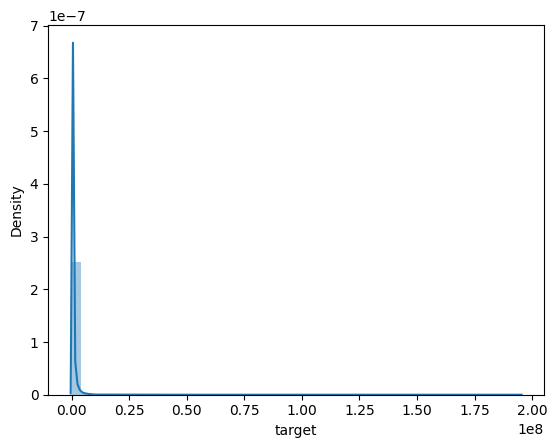

In [35]:
sns.distplot(home_data['target'])

### Корреляционный анализ

Определим, какие факторы наиболее сильно влияют на стоимость домов.

<Axes: >

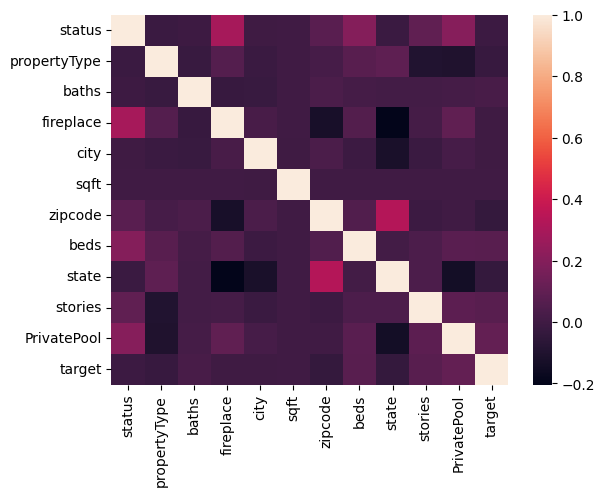

In [36]:
# home_data_d = home_data[['baths', 'sqft', 'zipcode', 'beds', 'stories', 'target']]
sns.heatmap(home_data.corr())

## 5. Моделирование

Рассмотрим различные алгоритмы машинного обучения,такие как:
* Линейная регрессия
* Деревья решений
* Случайный лес
* Градиентный бустинг

Разделим данные на обучающую и тестовую выборки, обучим модель и оценим её производительность с помощью метрик (MAE, RMSE и т.д.).

In [37]:
X = home_data[['status', 'propertyType', 'baths', 'fireplace', 'city', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'PrivatePool']]
y = home_data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [38]:
LR = LinearRegression()
LR.fit(X_train,y_train)
predictions = LR.predict(X_test)

In [39]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 555136.3897790707, MSE: 2651727589985.6846, R²: 0.030304889001723567
RMSE: 1628412.5982028279


In [40]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [41]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 283614.0301898611, MSE: 2154155073202.5576, R²: 0.21225933964509103
RMSE: 1467704.0141672154


In [42]:
# Создание модели
rf_model = RandomForestRegressor( n_estimators = 103,
    max_depth = 30, min_samples_leaf = 2)
model =  rf_model.fit(X_train, y_train)
predictions = model.predict(X_test)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [43]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 239911.02267767655, MSE: 1168223692236.9736, R²: 0.5727989529570554
RMSE: 1080843.972198103


In [44]:
reg = GradientBoostingRegressor(n_estimators = 76,
    max_depth = 40, learning_rate = 0.1)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [45]:
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
r2 = metrics.r2_score(y_test, predictions)

print(f'MAE: {mae}, MSE: {mse}, R²: {r2}')

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 277361.4070570282, MSE: 2002462631798.053, R²: 0.2677308818053228
RMSE: 1415083.9663419458


Наилучший результат показал алгоритм ***Случайный лес***.

## 6. Разработка сервера

### Выбор фреймворка

Используем Flask или FastAPI для создания RESTful API.

### Создание API

* Создадим эндпоинт для получения данных о доме.
* Реализуем логику для обработки входящих данных и предсказания стоимости.

In [ ]:
import csv
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
import joblib
data = pd.read_csv(r'C:\Users\User\OneDrive\Рабочий стол\курсы\уроки курсов\FINAL\data.csv')

home_data = data.copy()

home_data['baths'] = home_data['baths'].str.extract('(\d+)')
home_data['baths'] = pd.to_numeric(home_data['baths'])

home_data['beds'] = home_data['beds'].str.extract('(\d+)')
home_data['beds'] = pd.to_numeric(home_data['beds'])

home_data['zipcode'] = home_data['zipcode'].str.extract('(\d+)')
home_data['zipcode'] = pd.to_numeric(home_data['zipcode'])

home_data['stories'] = home_data['stories'].str.extract('(\d+)')
home_data['stories'] = pd.to_numeric(home_data['stories'])

home_data['sqft'] = home_data['sqft'].replace({'sqft': '', ',':''}, regex=True)
home_data['sqft'] = pd.to_numeric(home_data['sqft'], errors='coerce')

home_data['target'] = home_data['target'].replace({'\$': '', ',':''}, regex=True)
home_data['target'] = pd.to_numeric(home_data['target'], errors='coerce')

home_data['MlsId'] = home_data['MlsId'].fillna('')
home_data['mls-id'] = home_data['mls-id'].fillna('')
home_data['MlsId'] = home_data['MlsId'] + home_data['mls-id']
del home_data['mls-id']

home_data['PrivatePool'] = home_data['PrivatePool'].fillna('')
home_data['private pool'] = home_data['private pool'].fillna('')
home_data['PrivatePool'] = home_data['PrivatePool'] + home_data['private pool']
home_data['PrivatePool'] = home_data['PrivatePool'].replace('', 'No')
del home_data['private pool']

labelencoder = LabelEncoder()
home_data['city'] = labelencoder.fit_transform(home_data['city'])
home_data['state'] = labelencoder.fit_transform(home_data['state'])

home_data['status'] = home_data['status'].replace({'for sale': 'For sale', 'Coming sooon: (Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec) \d{1,2}\.': 'Coming soon'}, regex=True)

home_data['PrivatePool'] = home_data['PrivatePool'].replace('yes', 'Yes')

home_data['propertyType'] = home_data['propertyType'].replace({'single-family home': 'Single Family Home', 'Single Family': 'Single Family Home', 'condo': 'Condo', 'Land': 'lot/land'})

home_data['fireplace'] = home_data['fireplace'].replace({'yes': 'Yes', 'Fireplace': 'Yes'})

home_data['status'] = labelencoder.fit_transform(home_data['status'])
home_data['propertyType'] = labelencoder.fit_transform(home_data['propertyType'])
home_data['fireplace'] = labelencoder.fit_transform(home_data['fireplace'])
home_data['PrivatePool'] = labelencoder.fit_transform(home_data['PrivatePool'])

home_data = home_data[['status', 'propertyType', 'baths', 'fireplace', 'city', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'PrivatePool', 'target']]

home_data.fillna(0, inplace=True)

X = home_data[['status', 'propertyType', 'baths', 'fireplace', 'city', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'PrivatePool']]
y = home_data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

rf_model = RandomForestRegressor( n_estimators = 103,
                                 max_depth = 30, min_samples_leaf = 2)
rf_model.fit(X_train, y_train)

joblib.dump(model, 'model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    input_data = pd.DataFrame(data, index=[0])
    
    prediction = model.predict(input_data)
    
    return jsonify({'predicted_price': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)

### Документация API

Используем Swagger или Postman для документирования вашего API.